In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from kneebow.rotor import Rotor

In [2]:
# reference: https://benalexkeen.com/k-means-clustering-in-python/

In [3]:
### Initialisation
df_features = pd.read_json ('/Users/hedayattabesh/Documents/scripts/Meme-Analysis/data/memes-beta-features.json')
output_file_name = "memes-clustered-features.json"
# Testing
# df_features = df_features.head(100)

In [4]:
# create df with X, Y cordinates <- this will make it easier to handle the cordinates
feature_cordinates = pd.DataFrame(columns=['X','Y','path'])
for index, row in df_features.iterrows():
    new_row = {'X':row[1][0], 'Y':row[1][1], 'path':row[0]}
    feature_cordinates = feature_cordinates.append(new_row, ignore_index=True)

In [5]:
# now that we have a feel for it lets calculate some satistics 
kmean_clusters = []
wcss = []
silhouette_avg_scores = []
for k in range(3, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(feature_cordinates[['X', 'Y']])
    labels = kmeans.predict(feature_cordinates[['X', 'Y']])
    kmean_clusters.append(kmeans)
    wcss.append(kmeans.inertia_)
    silhouette_avg_scores.append(silhouette_score(feature_cordinates[['X', 'Y']], labels))

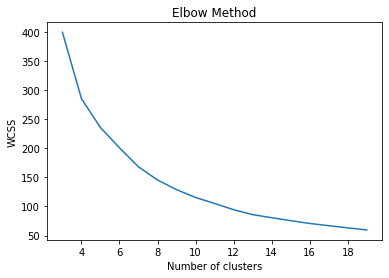

In [7]:
# The total WSS measures the compactness of the clustering and we want it to be as small as possible.
# We are looking for where the curve bends
# Set up wcss to find elbow
new_wcss = []
for i, temp in enumerate(wcss):
    new_wcss.append([i+3, temp])

# Visualization
plt.plot(range(3, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

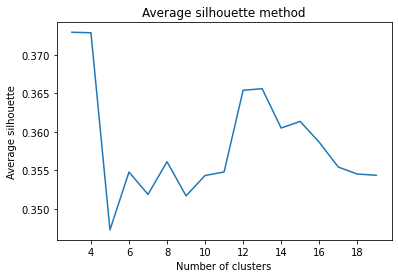

In [8]:
# determines how well each object lies within its cluster
# The location of the maximum is considered as the appropriate number of clusters.
k_silhouette = np.argmax(silhouette_avg_scores)+3

# visualization
plt.plot(range(3, 20), silhouette_avg_scores)
plt.title('Average silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Average silhouette')
plt.show()

In [9]:
# get elbow of wcss
rotor = Rotor()
rotor.fit_rotate(new_wcss)
k_wcss = rotor.get_elbow_index()+3

In [10]:
k = int(np.floor((k_wcss+k_silhouette/2)))

In [11]:
# now lets do the same thing but with the libraries
kmeans = KMeans(n_clusters=k)
kmeans.fit(feature_cordinates[['X', 'Y']])
labels = kmeans.predict(feature_cordinates[['X', 'Y']])
centroids = kmeans.cluster_centers_

In [12]:
# lets save to a new json
feature_cordinates['cluster'] = labels
feature_cordinates.to_json(output_file_name)


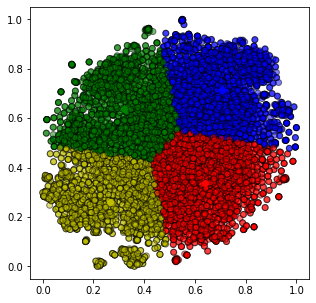

In [13]:
# # visualization
# colmap = {0: 'r', 1: 'g', 2: 'b', 3:'y', 4:'c', 5:'m', 6:'tab:brown', 7:'tab:purple', 8:'peru', 9:'slategrey'}
# fig = plt.figure(figsize=(5, 5))
# colors = map(lambda x: colmap[x], labels)

# plt.scatter(feature_cordinates['X'], feature_cordinates['Y'], color=list(colors), alpha=0.5, edgecolor='k')
# for idx, centroid in enumerate(centroids):
#     plt.scatter(*centroid, color=colmap[idx])

0       /Users/hedayattabesh/Documents/scripts/Meme-Analysis/data/fb-dataset/img/69351.png
1       /Users/hedayattabesh/Documents/scripts/Meme-Analysis/data/fb-dataset/img/17843.png
2       /Users/hedayattabesh/Documents/scripts/Meme-Analysis/data/fb-dataset/img/27980.png
3       /Users/hedayattabesh/Documents/scripts/Meme-Analysis/data/fb-dataset/img/24537.png
4       /Users/hedayattabesh/Documents/scripts/Meme-Analysis/data/fb-dataset/img/53967.png
                                               ...                                        
9995    /Users/hedayattabesh/Documents/scripts/Meme-Analysis/data/fb-dataset/img/10853.png
9996    /Users/hedayattabesh/Documents/scripts/Meme-Analysis/data/fb-dataset/img/68730.png
9997    /Users/hedayattabesh/Documents/scripts/Meme-Analysis/data/fb-dataset/img/31645.png
9998    /Users/hedayattabesh/Documents/scripts/Meme-Analysis/data/fb-dataset/img/17682.png
9999    /Users/hedayattabesh/Documents/scripts/Meme-Analysis/data/fb-dataset/img/69348.png